In [ ]:
import pandas as pd
import math
import collections
import matplotlib.pyplot as plt

: 

In [83]:
# Se crea un dataframe con el csv
df = pd.read_csv('coordenadas.csv', delimiter=',')

#Se crea una lista de listas
c = [list(row) for row in df.values]
print(c)

[[2, 3, 'azul'], [4, 4, 'rojo'], [2, 5, 'azul'], [4, 5, 'rojo'], [3, 4, 'azul']]


In [84]:
#DISTANCIA EUCLIDIANA

def euclidiana(a,b):                    #listas de coordenadas como parámetros de entrada, a es el punto ya clasificado y b por clasificar
    sum=0
    sum2 = [i for i in range(1)]
   
    for i in range(len(b)):
        sum += math.pow(a[i]-b[i], 2)   #suma de las diferencias al cuadrado

    sum2[0] = math.sqrt(sum)            #raiz cuadrada de la sumatoria  
    sum2.append(a[2])                   #Se agrega la clase del punto clasificado a la distancia 
    return sum2                         #Regresa una lista con la distancia entre el punto a y b y la clase del punto a 


In [85]:
#ORDENAR LAS DISTANCIAS

def ordenar(distancias):
    
    n= len(distancias)-1

    for i in range(len(distancias)-1):
        for j in range(n):
            if distancias[j] > distancias[j+1]:
                a=distancias[j]
                distancias[j]=distancias[j+1]
                distancias[j+1]=a   
            n-1



In [86]:
#K VECINOS MAS CERCANOS

def vecinosCercanos(k,d):
    
    cercanos=[i for i in range(k)] 

    for i in range(k):
        cercanos[i] = d[i]
    return cercanos    


In [87]:
#DEFINIR CLASE
#vec=[[2.23606797749979, 'azul'], [2.23606797749979, 'rojo'], [3.0, 'azul'], [4.0, 'verde'], [5.0, 'verde'], [6.0, 'verde']]


def claseMay(vecinos):        #Se recibe una lista con las distancias y la clase de cada punto

    clases=[i for i in vecinos]  

    for i in range(len(vecinos)):
        clases[i]= vecinos[i][-1]   #Se sacan las clases y se guardan en una lista
    
    clase=collections.Counter(clases).most_common() #Se cuentan las pcurrencias de las clases que hay en la lista "clases" ordenados de mayor a menor
    
    return clase[0][0]  #Regresa la clase que tiene más ocurrencias
      

#claseMay(vec)

In [88]:
#KNN (SE LLAMA A LOS DEMAS METODOS)

def knn(puntoNuevo, puntosExistentes):
    d= [i for i in range(len(puntosExistentes))]
    vc=[]
    nuevo=[]
    for i in range(len(puntoNuevo)):
        for j in range(len(puntosExistentes)):
            d[j]= euclidiana(puntosExistentes[j],puntoNuevo[i]) #Se saca la distancia euclidiana

        ordenar(d) #Se ordena la lista de coordenadas    
        
        vc=vecinosCercanos(3,d) #Se sacan los k vecinos mas cercanos

        clase = claseMay(vc)    #Se elige la clase a la que pertenece
        
       # Lo que hago aqui es que voy almacenando todas las nuevas clasificaciones,
        # es decir, si tienes mas de 1 punto, retorno un lista con la clasificacion
        # de todos los puntos nuevos.
        nuevo.append(clase)

    return nuevo


In [89]:
#SE DA UN NUEVO PUNTO
#s = [[3,7]] #azul
#s = [[5,6]] #rojo
#s = [[1,3]] #azul
#s = [[3.5,4.5]] #rojo

Text(0, 0.5, 'Y')

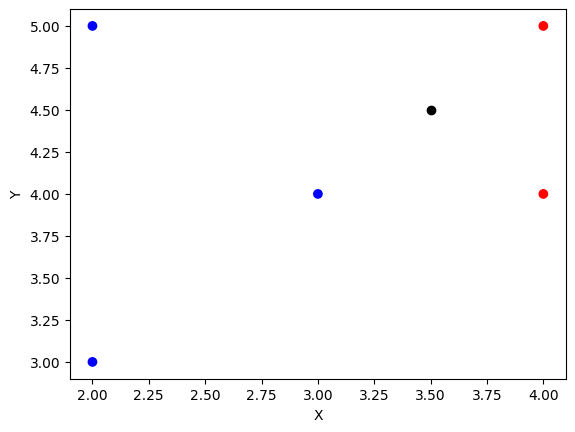

In [90]:
#GRAFICA CON EL PUNTO NUEVO (SIN CLASIFICAR)

xc=[i for i in range(len(c))]
yc=[i for i in range(len(c))]
cc=[i for i in range(len(c))]
xs=[]
ys=[]



#Sacar coordenadas x y y de los puntos clasificados y ponerlas en listas respectivamente
for i in range(len(c)):
    xc[i]=c[i][0]
    yc[i]=c[i][1]

for i in range(len(c)):
    cc[i]=c[i][2]
    

#Sacar coordenadas x y y del nuevo punto (sin clasificar)
xs=[s[0][0]]
ys=[s[0][1]]


#Crear diccionario de colores
colores = {"azul": "blue", "rojo": "red"}
colores2 = df.Clase.map(colores)


#Grafica
plt.scatter(x= xc,y = yc, color= colores2)
plt.scatter(x= xs,y = ys, color= "black")
plt.xlabel("X")
plt.ylabel("Y")
#fig, ax = plt.subplots()
#ax.scatter(x = xc,y = yc, c = color)



In [91]:
#SE LLAMA AL KNN PARA ENCONTRAR LA CLASE A LA QUE PERTENECE EL NUEVO PUNTO

knn(s,c)

'rojo'